This notebook provides an analysis of a match Argentina-Croatia in FIFA final 2018 using Statsbomb

In [38]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
from mplsoccer import Pitch, Sbopen, VerticalPitch
from statsbombpy import sb
from sklearn.cluster import KMeans

In [2]:
# All the compititions in statsbomb
comp = sb.competitions()
comp.head()

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,16,4,Europe,Champions League,male,False,False,2018/2019,2023-03-07T12:20:48.118250,2021-06-13T16:17:31.694,None,2023-03-07T12:20:48.118250
1,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
2,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
3,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,26,Europe,Champions League,male,False,False,2014/2015,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00


In [3]:
comp.shape

(44, 12)

In [4]:
# Types of competition available
comp['competition_name'].unique()

array(['Champions League', "FA Women's Super League", 'FIFA World Cup',
       'Indian Super league', 'La Liga', 'NWSL', 'Premier League',
       'UEFA Euro', "UEFA Women's Euro", "Women's World Cup"],
      dtype=object)

In [5]:
# Available data for FIFA World Cup
comp[comp['competition_name'] == 'FIFA World Cup']

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
18,43,106,International,FIFA World Cup,male,False,True,2022,2023-06-24T17:17:27.911026,2023-06-24T17:18:55.629111,2023-06-24T17:18:55.629111,2023-06-24T17:17:27.911026
19,43,3,International,FIFA World Cup,male,False,True,2018,2022-09-05T17:17:56.670896,2021-06-13T16:17:31.694,None,2022-09-05T17:17:56.670896


In [6]:
# Get to the games of FIFA 2018
matches = sb.matches(competition_id=43, season_id=3)

In [7]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   match_id               64 non-null     int64 
 1   match_date             64 non-null     object
 2   kick_off               64 non-null     object
 3   competition            64 non-null     object
 4   season                 64 non-null     object
 5   home_team              64 non-null     object
 6   away_team              64 non-null     object
 7   home_score             64 non-null     int64 
 8   away_score             64 non-null     int64 
 9   match_status           64 non-null     object
 10  match_status_360       64 non-null     object
 11  last_updated           64 non-null     object
 12  last_updated_360       64 non-null     object
 13  match_week             64 non-null     int64 
 14  competition_stage      64 non-null     object
 15  stadium                64

In [8]:
# Convert 'match_date' column to datetime
matches['match_date'] = pd.to_datetime(matches['match_date'])

# Sort DataFrame by 'match_date'
matches = matches.sort_values('match_date')

matches

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
45,7525,2018-06-14,17:00:00.000,International - FIFA World Cup,2018,Russia,Saudi Arabia,5,0,available,...,2021-06-13T16:17:31.694,1,Group Stage,Stadion Luzhniki,Néstor Fabián Pitana,Stanislav Cherchesov,Juan Antonio Pizzi Torroja,1.0.2,None,None
1,7578,2018-06-15,14:00:00.000,International - FIFA World Cup,2018,Egypt,Uruguay,0,1,available,...,2021-06-13T16:17:31.694,1,Group Stage,\tEkaterinburg Arena,Björn Kuipers,Héctor Raúl Cúper,Óscar Washington Tabárez Silva,1.0.2,None,None
43,7577,2018-06-15,17:00:00.000,International - FIFA World Cup,2018,Morocco,Iran,0,1,available,...,2021-06-13T16:17:31.694,1,Group Stage,Saint-Petersburg Stadium,Cüneyt Çakιr,Hervé Renard,Carlos Manuel Brito Leal Queiróz,1.0.2,None,None
9,7576,2018-06-15,20:00:00.000,International - FIFA World Cup,2018,Portugal,Spain,3,3,available,...,2021-06-13T16:17:31.694,1,Group Stage,\tOlimpiyskiy Stadion Fisht,Gianluca Rocchi,Fernando Manuel Fernandes da Costa Santos,Fernando Ruiz Hierro,1.0.2,None,None
34,7531,2018-06-16,15:00:00.000,International - FIFA World Cup,2018,Argentina,Iceland,1,1,available,...,2021-06-13T16:17:31.694,1,Group Stage,Otkritie Bank Arena,Szymon Marciniak,Jorge Luis Sampaoli Moya,Heimir Hallgrímsson,1.0.2,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54,8651,2018-07-07,16:00:00.000,International - FIFA World Cup,2018,Sweden,England,0,2,available,...,2021-06-13T16:17:31.694,5,Quarter-finals,\tSolidarnost Arena,Björn Kuipers,Jan Olof Andersson,Gareth Southgate,1.0.2,None,None
57,8655,2018-07-10,20:00:00.000,International - FIFA World Cup,2018,France,Belgium,1,0,available,...,2021-06-13T16:17:31.694,6,Semi-finals,Saint-Petersburg Stadium,Andrés Cunha,Didier Deschamps,Roberto Martínez Montoliú,1.0.2,None,None
53,8656,2018-07-11,20:00:00.000,International - FIFA World Cup,2018,Croatia,England,2,1,available,...,2021-06-13T16:17:31.694,6,Semi-finals,Stadion Luzhniki,Cüneyt Çakιr,Zlatko Dalić,Gareth Southgate,1.0.2,None,None
58,8657,2018-07-14,16:00:00.000,International - FIFA World Cup,2018,Belgium,England,2,0,available,...,2021-06-13T16:17:31.694,7,3rd Place Final,Saint-Petersburg Stadium,Alireza Faghani,Roberto Martínez Montoliú,Gareth Southgate,1.0.2,None,None


We will look closer to the final match Argentina - France

In [9]:
MATCH_ID = 8658

m_event = sb.events(match_id = MATCH_ID)

In [10]:
m_event

,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,carry_end_location,clearance_aerial_won,counterpress,dribble_outcome,dribble_overrun,duel_outcome,duel_type,...,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,team_id,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 442, 'lineup': [{'player': {'id'...",France,771,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 433, 'lineup': [{'player': {'id'...",Croatia,785,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,France,771,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Croatia,785,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Croatia,785,00:00:00.000,Half Start,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Tactical,Corentin Tolisso,NaN,France,771,00:27:51.840,Substitution,NaN
2974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Tactical,Marko Pjaca,NaN,Croatia,785,00:35:50.467,Substitution,NaN
2975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Tactical,Nabil Fekir,NaN,France,771,00:35:57.787,Substitution,NaN
2976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,France,771,00:23:08.400,Error,NaN


In [11]:
m_event.columns

Index(['ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'block_deflection', 'carry_end_location', 'clearance_aerial_won',
       'counterpress', 'dribble_outcome', 'dribble_overrun', 'duel_outcome',
       'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_penalty', 'foul_committed_type',
       'foul_won_advantage', 'foul_won_defensive', 'goalkeeper_body_part',
       'goalkeeper_end_location', 'goalkeeper_outcome', 'goalkeeper_position',
       'goalkeeper_technique', 'goalkeeper_type', 'id', 'index',
       'injury_stoppage_in_chain', 'interception_outcome', 'location',
       'match_id', 'minute', 'pass_aerial_won', 'pass_angle',
       'pass_assisted_shot_id', 'pass_backheel', 'pass_body_part',
       'pass_cross', 'pass_cut_back', 'pass_deflected', 'pass_end_location',
       'pass_goal_assist', 'pass_height', 'pass_length', 'pass_outcome',
       'pass_recipient', 'pass_shot_assist', 'pass_switch', 'pass_type',
    

In [12]:
m_event[m_event['team'] == 'Croatia']

,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,carry_end_location,clearance_aerial_won,counterpress,dribble_outcome,dribble_overrun,duel_outcome,duel_type,...,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,team_id,timestamp,type,under_pressure
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 433, 'lineup': [{'player': {'id'...",Croatia,785,00:00:00.000,Starting XI,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Croatia,785,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Croatia,785,00:00:00.000,Half Start,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Croatia,785,00:00:00.400,Pass,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Croatia,785,00:00:02.347,Pass,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Croatia,785,00:41:27.400,Goal Keeper,NaN
2966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Croatia,785,00:48:26.080,Half End,NaN
2968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Croatia,785,00:50:03.760,Half End,NaN
2972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Tactical,Andrej Kramarić,NaN,Croatia,785,00:25:24.280,Substitution,NaN


We are going to look at players, players_id, passes, etc

In [13]:
m_event.player_id.unique()
m_event.player.unique()

array([nan, 'Mario Mandžukić', 'Marcelo Brozović', 'Luka Modrić',
       'Šime Vrsaljko', 'Danijel Subašić', 'Raphaël Varane',
       'Ivan Perišić', 'Ivan Rakitić', 'Ivan Strinić', 'Domagoj Vida',
       'Dejan Lovren', 'Benjamin Pavard', "N''Golo Kanté",
       'Antoine Griezmann', 'Hugo Lloris', 'Samuel Yves Umtiti',
       'Blaise Matuidi', 'Olivier Giroud', 'Paul Pogba',
       'Kylian Mbappé Lottin', 'Ante Rebić', 'Lucas Hernández Pi',
       "Steven N''Kemboanza Mike Christopher Nzonzi", 'Corentin Tolisso',
       'Andrej Kramarić', 'Nabil Fekir', 'Marko Pjaca'], dtype=object)

In [15]:
#MODRIC = 5463
m_event[m_event['player'] == 'Luka Modrić']['player_id']

8       5463.0
18      5463.0
62      5463.0
72      5463.0
92      5463.0
         ...  
2776    5463.0
2782    5463.0
2831    5463.0
2869    5463.0
2874    5463.0
Name: player_id, Length: 220, dtype: float64

In [16]:
MODRIC = 5463

df = m_event[(m_event['player_id'] == MODRIC) & (m_event['type'] == "Pass")].reset_index(drop=True)

In [17]:
df

,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,carry_end_location,clearance_aerial_won,counterpress,dribble_outcome,dribble_overrun,duel_outcome,duel_type,...,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,team_id,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Croatia,785,00:00:03.947,Pass,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Croatia,785,00:00:27.920,Pass,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Croatia,785,00:04:15.067,Pass,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Croatia,785,00:04:44.387,Pass,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Croatia,785,00:06:43.680,Pass,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Croatia,785,00:41:55.987,Pass,NaN
73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Croatia,785,00:42:44.627,Pass,NaN
74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Croatia,785,00:45:02.987,Pass,NaN
75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Croatia,785,00:46:27.507,Pass,NaN


We need x and y coordinates of a player 

In [18]:
df.location

0      [43.0, 56.0]
1      [56.0, 33.0]
2     [107.0, 77.0]
3      [48.0, 76.0]
4      [48.0, 69.0]
          ...      
72     [75.0, 57.0]
73     [75.0, 56.0]
74     [48.0, 61.0]
75     [79.0, 60.0]
76     [24.0, 53.0]
Name: location, Length: 77, dtype: object

In [19]:
df[['x_start', 'y_start']]=pd.DataFrame(df.location.tolist(), index = df.index)

In [20]:
df

,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,carry_end_location,clearance_aerial_won,counterpress,dribble_outcome,dribble_overrun,duel_outcome,duel_type,...,substitution_outcome,substitution_replacement,tactics,team,team_id,timestamp,type,under_pressure,x_start,y_start
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Croatia,785,00:00:03.947,Pass,NaN,43.0,56.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Croatia,785,00:00:27.920,Pass,NaN,56.0,33.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Croatia,785,00:04:15.067,Pass,NaN,107.0,77.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Croatia,785,00:04:44.387,Pass,NaN,48.0,76.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Croatia,785,00:06:43.680,Pass,True,48.0,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Croatia,785,00:41:55.987,Pass,NaN,75.0,57.0
73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Croatia,785,00:42:44.627,Pass,NaN,75.0,56.0
74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Croatia,785,00:45:02.987,Pass,NaN,48.0,61.0
75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Croatia,785,00:46:27.507,Pass,NaN,79.0,60.0


In [21]:
df[['x_end', 'y_end']]=pd.DataFrame(df.pass_end_location.tolist(), index = df.index)

In [22]:
df

,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,carry_end_location,clearance_aerial_won,counterpress,dribble_outcome,dribble_overrun,duel_outcome,duel_type,...,tactics,team,team_id,timestamp,type,under_pressure,x_start,y_start,x_end,y_end
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Croatia,785,00:00:03.947,Pass,NaN,43.0,56.0,42.0,79.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Croatia,785,00:00:27.920,Pass,NaN,56.0,33.0,46.0,30.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Croatia,785,00:04:15.067,Pass,NaN,107.0,77.0,110.0,79.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Croatia,785,00:04:44.387,Pass,NaN,48.0,76.0,90.0,73.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Croatia,785,00:06:43.680,Pass,True,48.0,69.0,42.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Croatia,785,00:41:55.987,Pass,NaN,75.0,57.0,83.0,53.0
73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Croatia,785,00:42:44.627,Pass,NaN,75.0,56.0,90.0,53.0
74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Croatia,785,00:45:02.987,Pass,NaN,48.0,61.0,60.0,76.0
75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Croatia,785,00:46:27.507,Pass,NaN,79.0,60.0,80.0,76.0


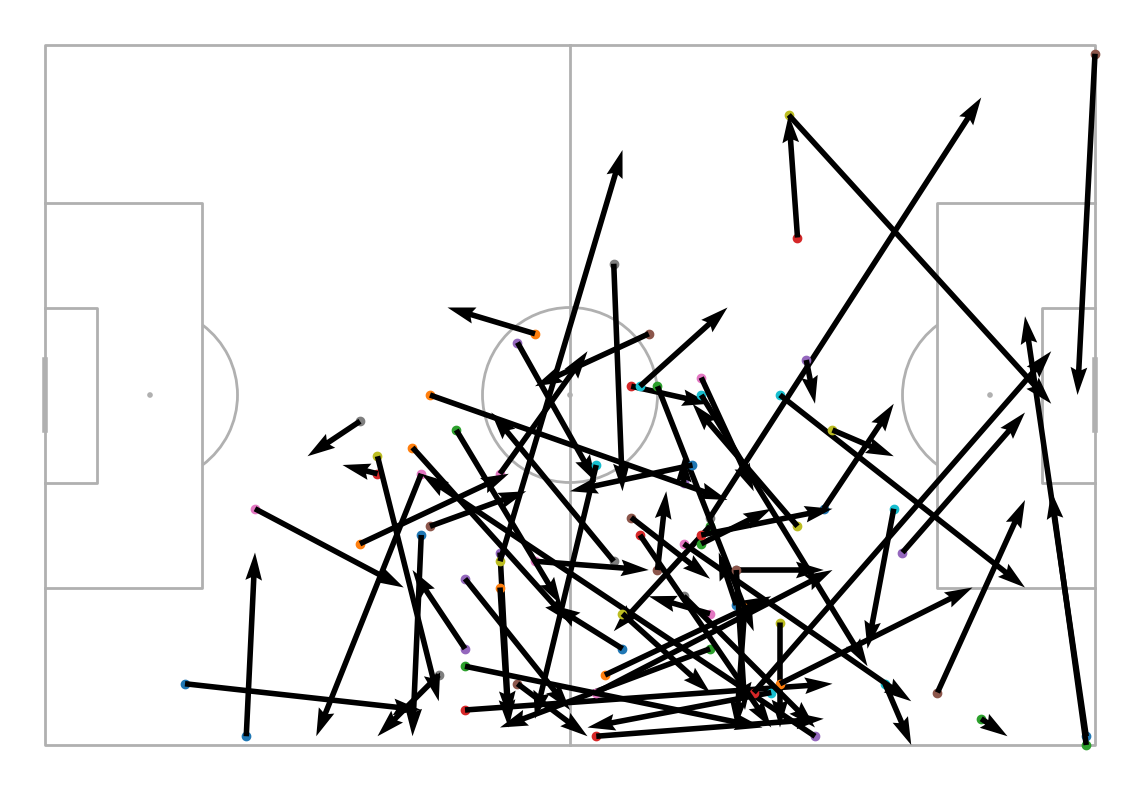

In [24]:
# Passes for Modric at first timestamp
pitch = Pitch(line_color='white', pitch_color='#98fb98')
fig, ax = p.draw(figsize = (12, 8 ))

df1 = df[0:1]

for index, row in df.iterrows():
    p.scatter(x=row['x_start'], y = row['y_start'], ax = ax)  
    p.arrows(xstart=row['x_start'], ystart = row['y_start'], xend = row['x_end'], yend= row['y_end'], ax=ax)

In [25]:
# Team players
Croatia = m_event[m_event.team == 'Croatia'].player.unique()
France = m_event[m_event.team == 'France'].player.unique()
France

array([nan, 'Raphaël Varane', 'Benjamin Pavard', "N''Golo Kanté",
       'Antoine Griezmann', 'Hugo Lloris', 'Samuel Yves Umtiti',
       'Blaise Matuidi', 'Olivier Giroud', 'Paul Pogba',
       'Kylian Mbappé Lottin', 'Lucas Hernández Pi',
       "Steven N''Kemboanza Mike Christopher Nzonzi", 'Corentin Tolisso',
       'Nabil Fekir'], dtype=object)

# Heatmaps

In [26]:
# Create new columns from 'location'
df_start = pd.DataFrame(m_event['location'].apply(pd.Series))

# Assign column names
df_start.columns = ['x_start', 'y_start']

# Create new columns from 'location'
df_end = pd.DataFrame(m_event['pass_end_location'].apply(pd.Series))

# Assign column names
df_end.columns = ['x_end', 'y_end']
df_end

,x_end,y_end
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
2973,NaN,NaN
2974,NaN,NaN
2975,NaN,NaN
2976,NaN,NaN


In [27]:
# Concatenate df_start and df_end horizontally (along columns)
df_concat = pd.concat([df_start, df_end], axis=1)

# Add the concatenated DataFrame to m_event
m_event = pd.concat([m_event, df_concat], axis=1)

In [28]:
def generatePlayerHeatMap(player_name):
    player_filter = (m_event.type == 'Pass') & (m_event.player == player_name)
    player_df = m_event.loc[player_filter, ['x_start', 'y_start', 'x_end', 'y_end']]

    pitch = Pitch(line_color='white',pitch_color='#98fb98')
    fig, ax = pitch.grid(figheight=6,grid_height=0.9, title_height=0.06, axis=False,endnote_height=0.04, title_space=0, endnote_space=0)
    #Create the heatmap
    pitch.kdeplot(
        x=player_df['x_start'],
        y=player_df['y_start'],
        shade = True,
        shade_lowest=False,
        alpha=.5,
        n_levels=10,
        cmap = 'plasma',
        ax=ax['pitch']
        )
    fig.suptitle(player_name+"'s Heatmap", fontsize = 16)

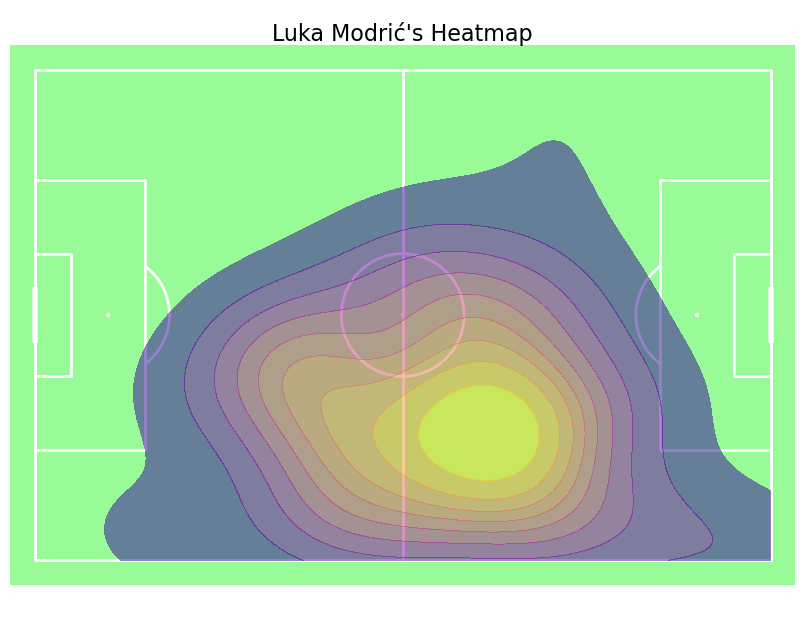

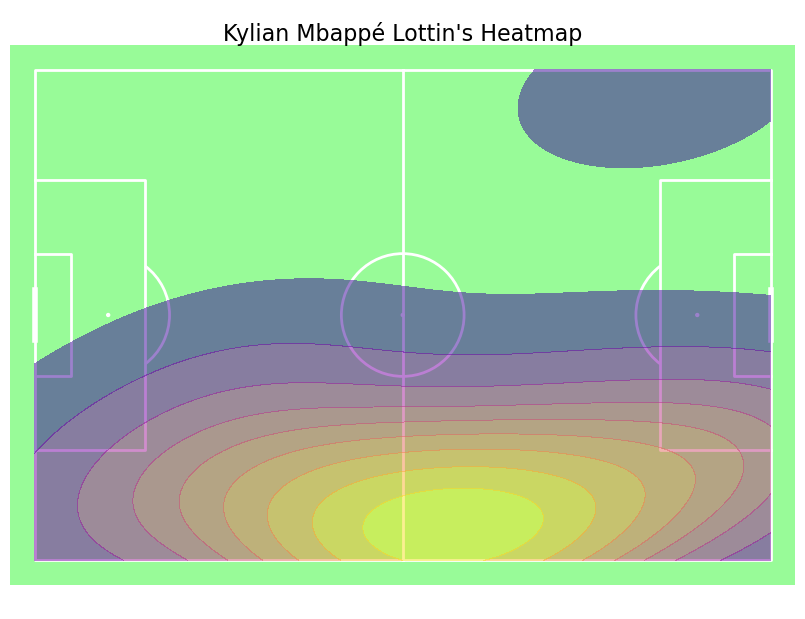

In [29]:
# Players individually
generatePlayerHeatMap("Luka Modrić")
generatePlayerHeatMap("Kylian Mbappé Lottin")

### Heatmap for France team

In [30]:
# Create a new list without NaN-like values
Croatia_cleaned = [value for value in Croatia if not (value != value)]
Croatia_cleaned

France_cleaned = [value for value in France if not (value != value)]
France_cleaned

['Raphaël Varane',
 'Benjamin Pavard',
 "N''Golo Kanté",
 'Antoine Griezmann',
 'Hugo Lloris',
 'Samuel Yves Umtiti',
 'Blaise Matuidi',
 'Olivier Giroud',
 'Paul Pogba',
 'Kylian Mbappé Lottin',
 'Lucas Hernández Pi',
 "Steven N''Kemboanza Mike Christopher Nzonzi",
 'Corentin Tolisso',
 'Nabil Fekir']

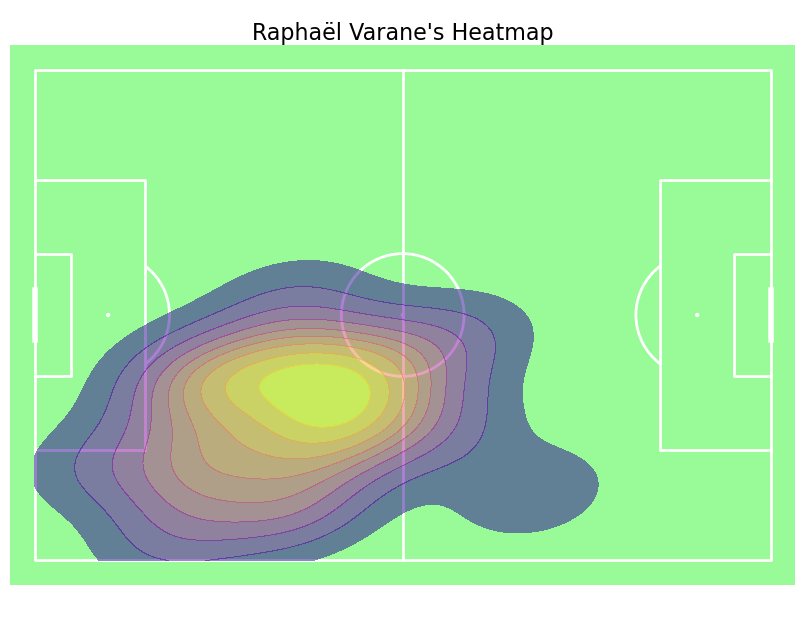

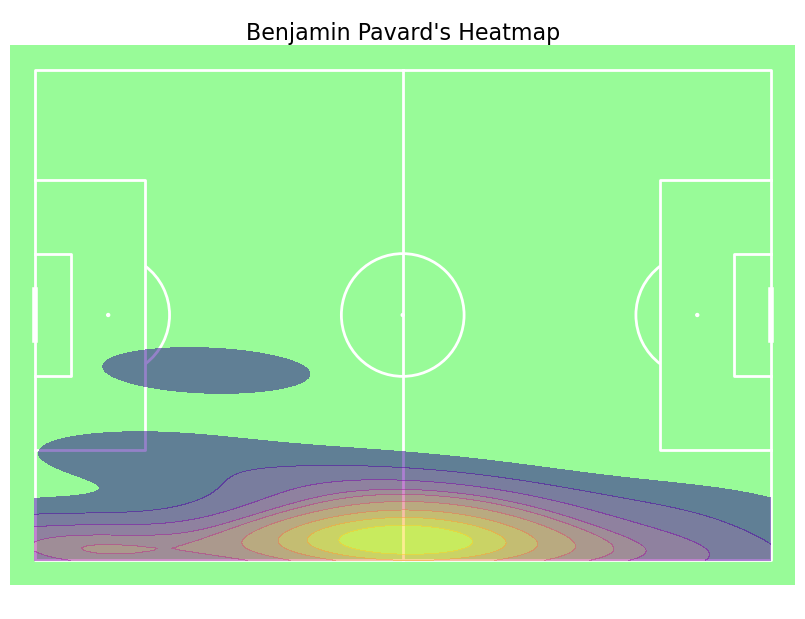

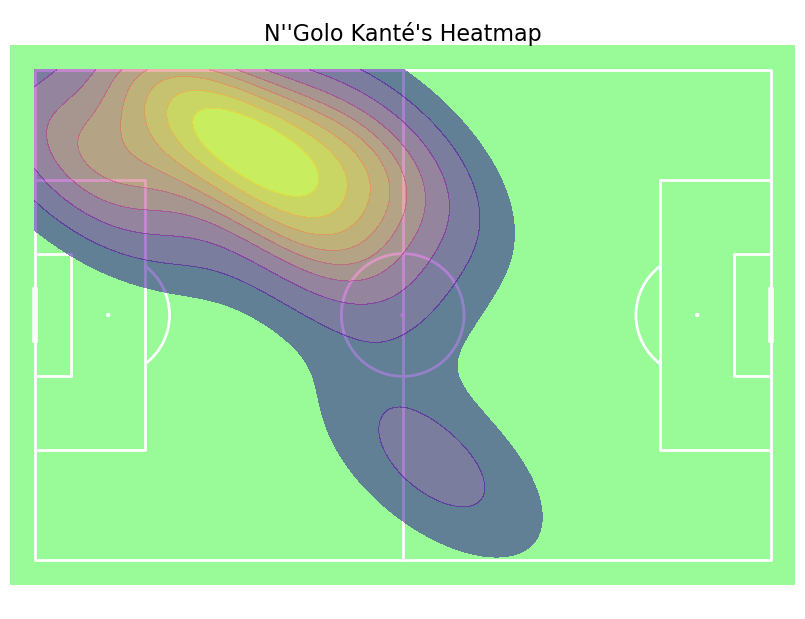

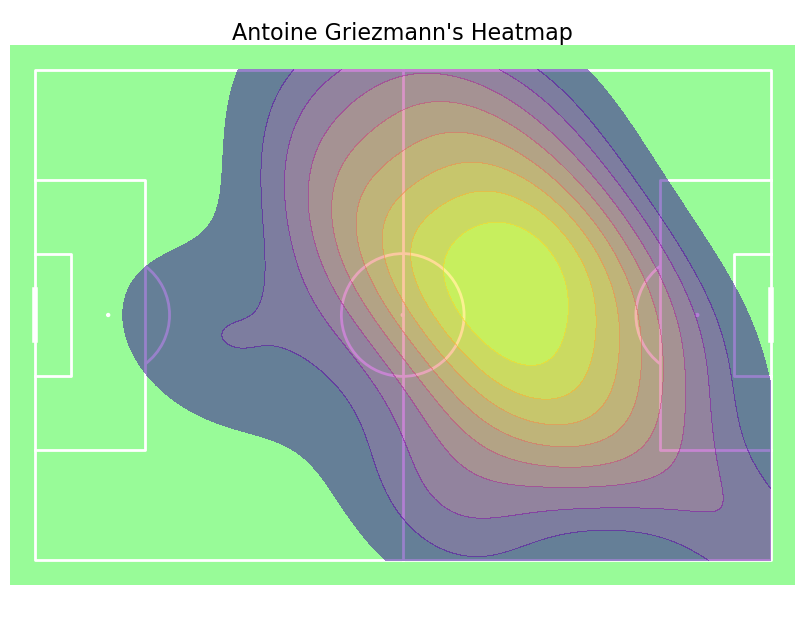

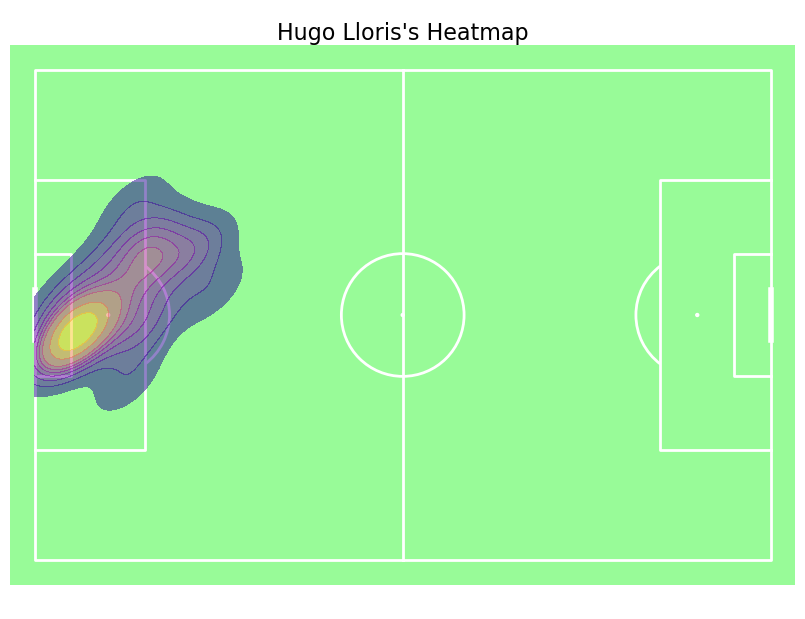

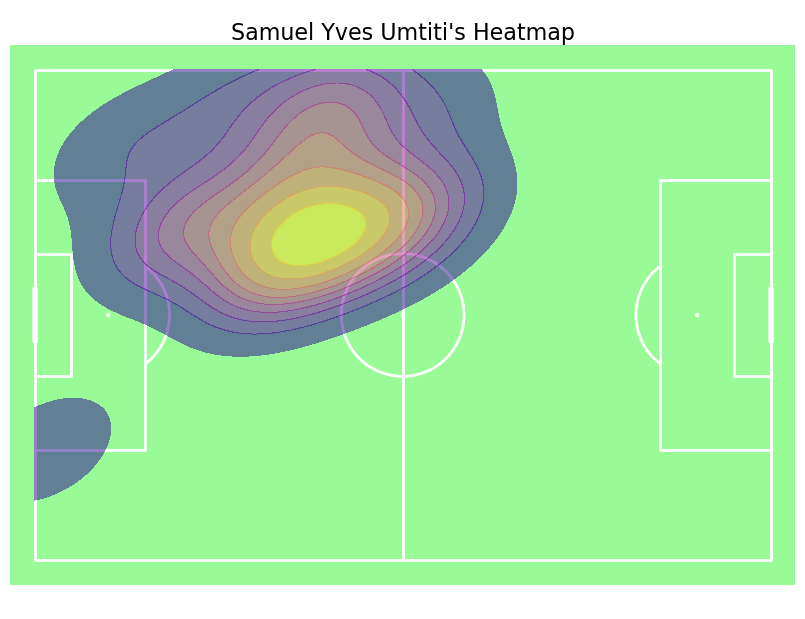

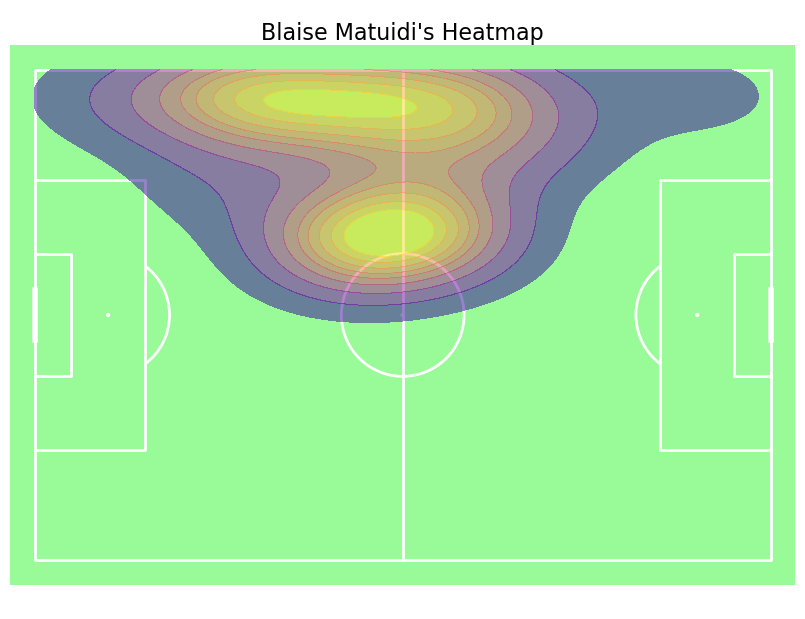

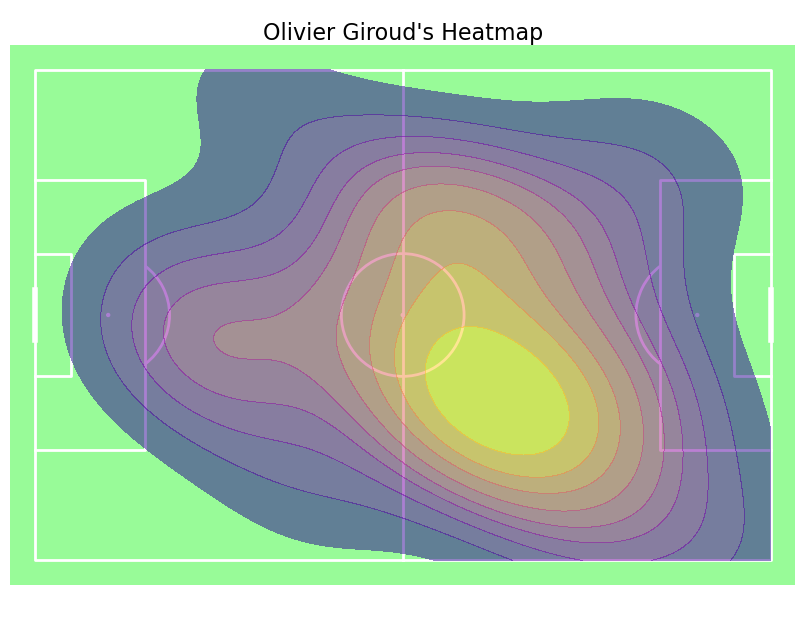

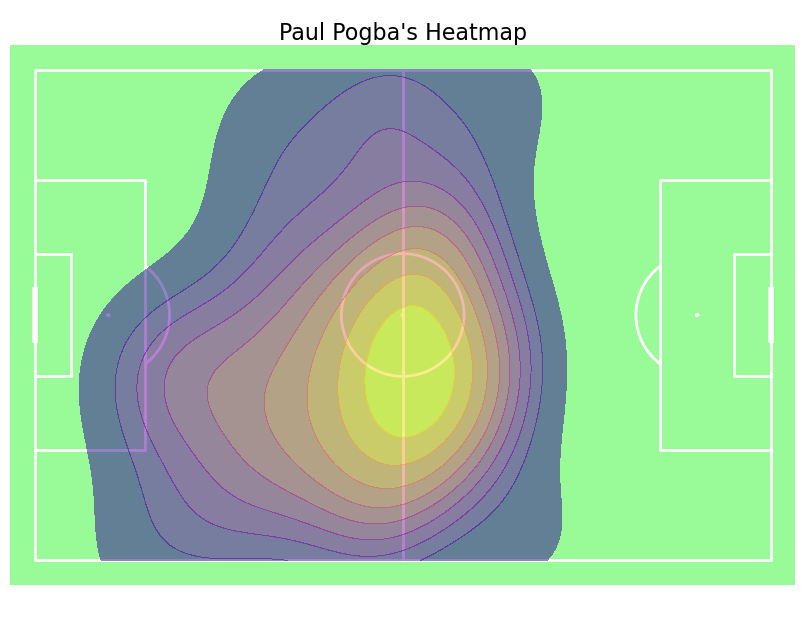

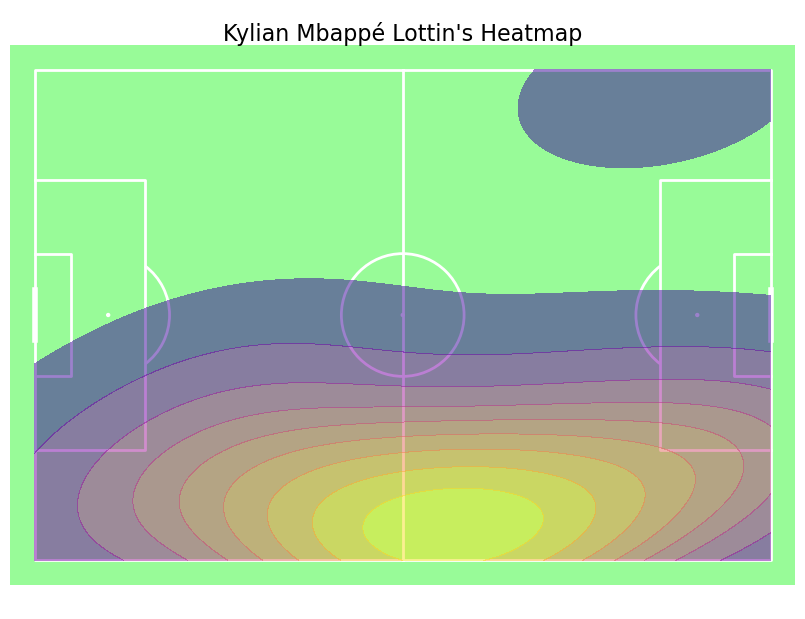

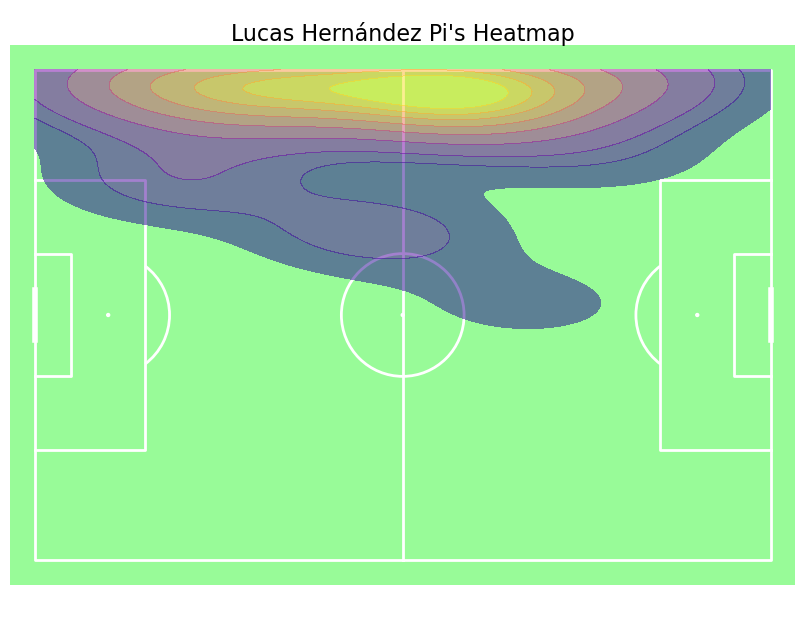

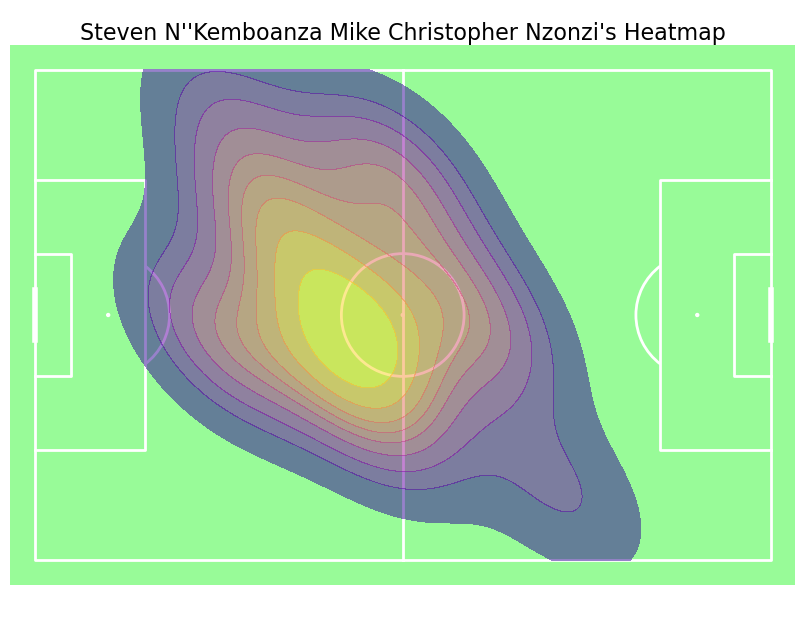

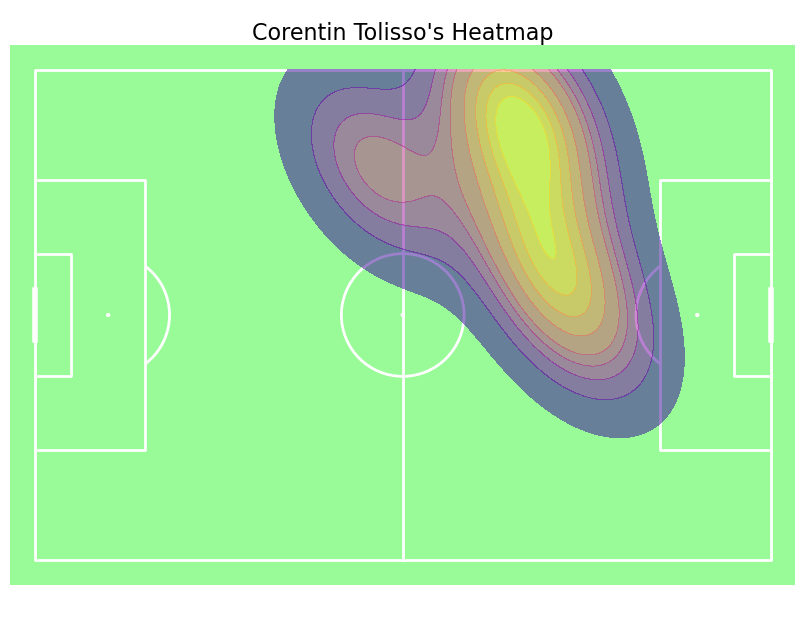

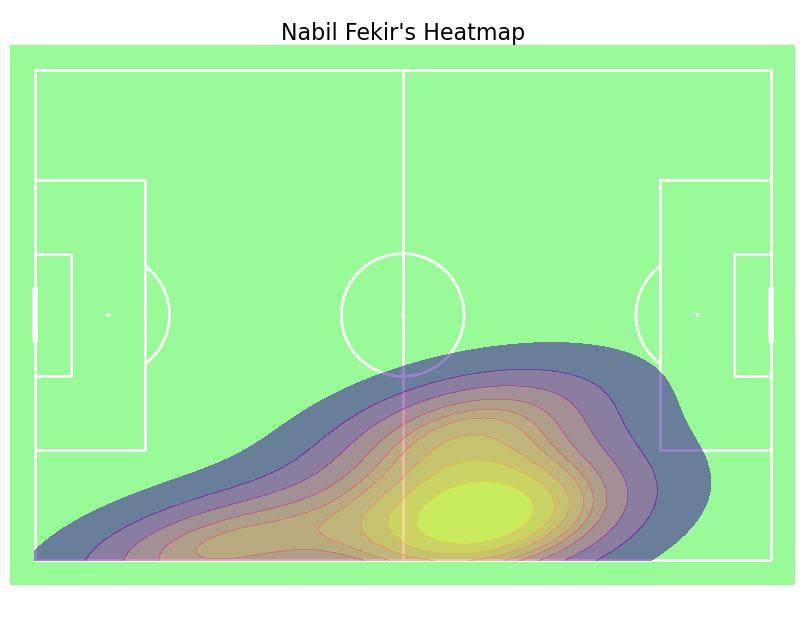

In [31]:
for player in France_cleaned:
    generatePlayerHeatMap(player)

### Heatmap for Croatia team

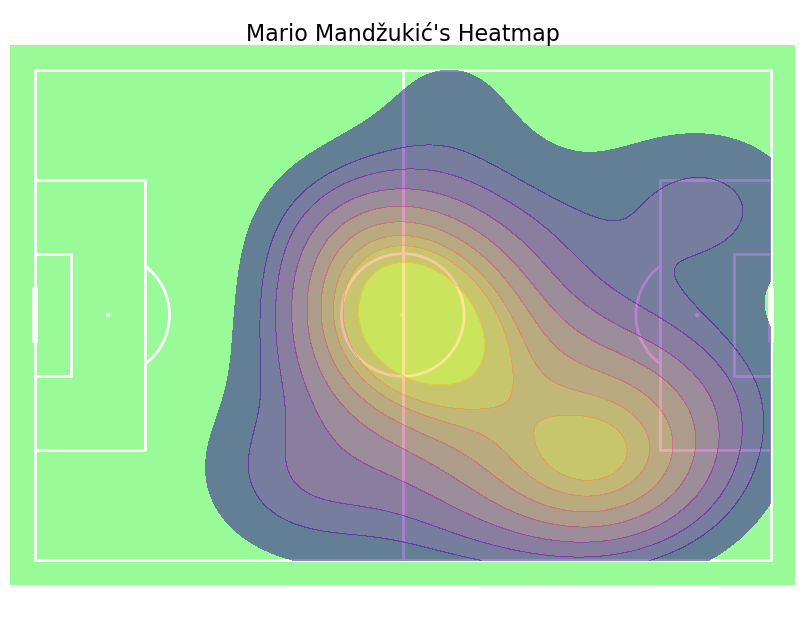

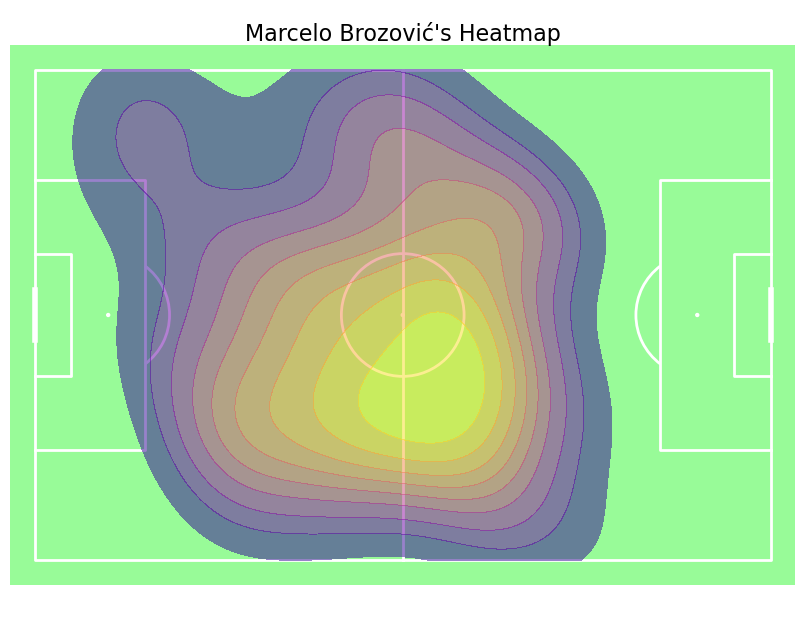

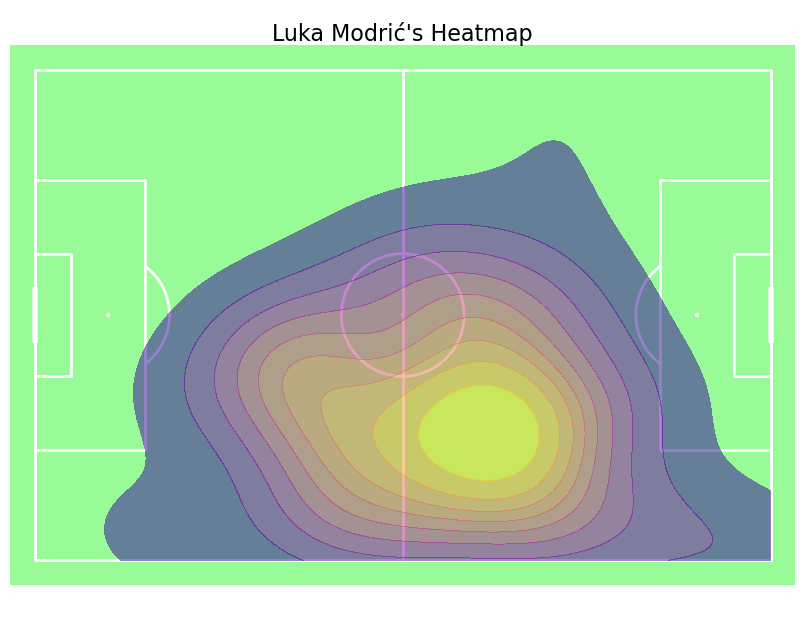

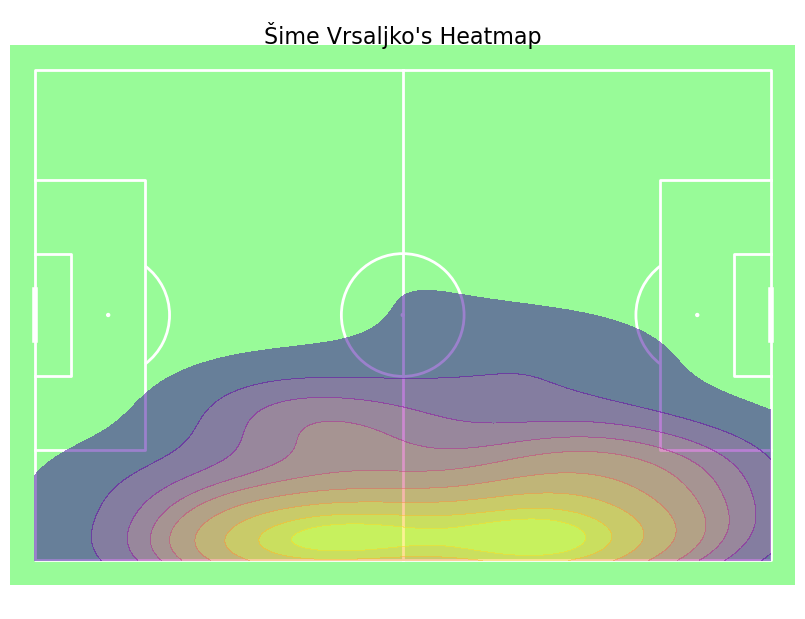

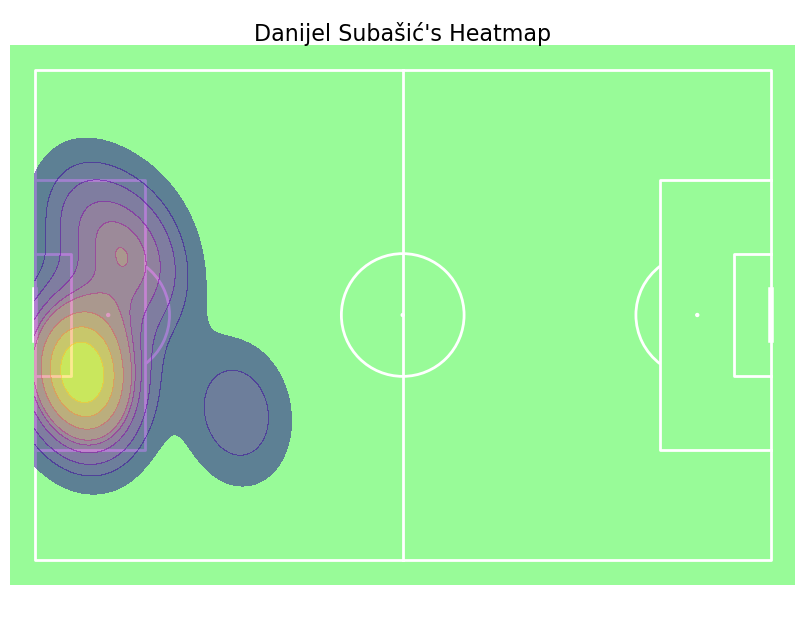

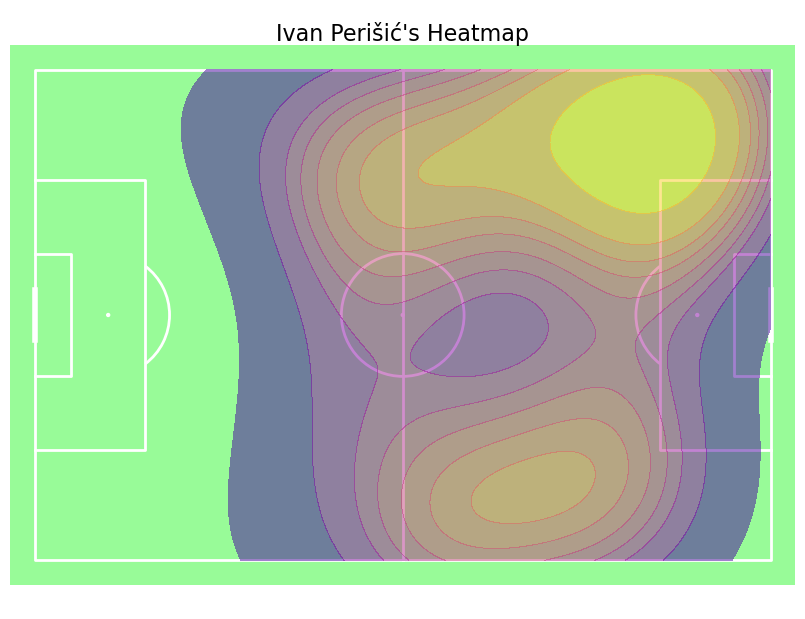

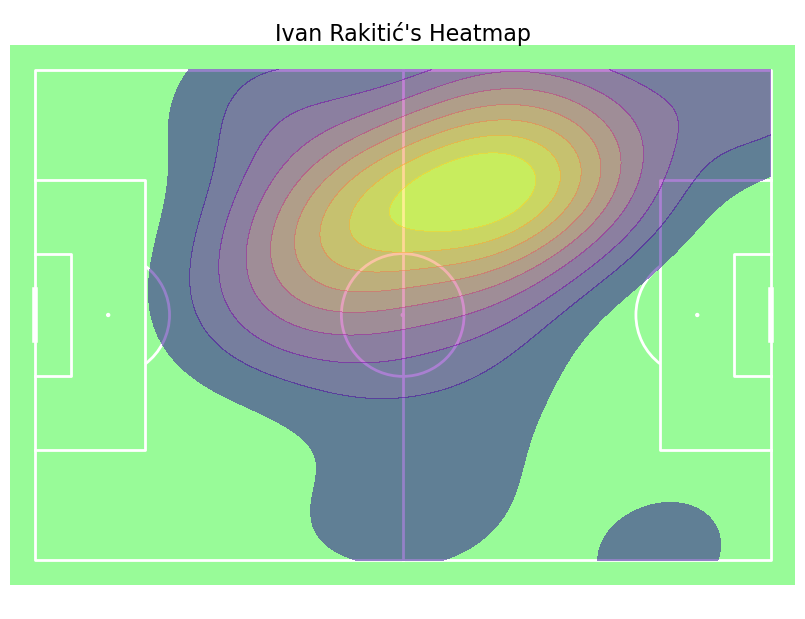

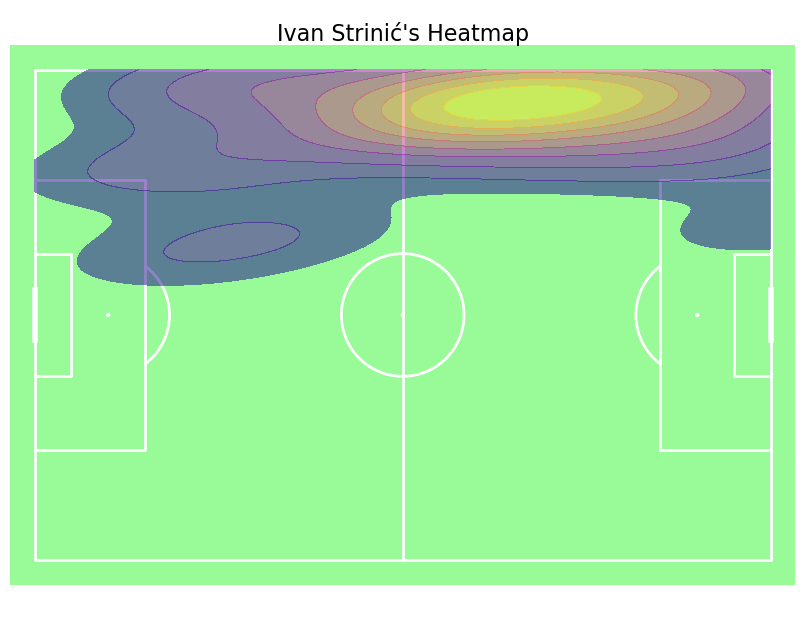

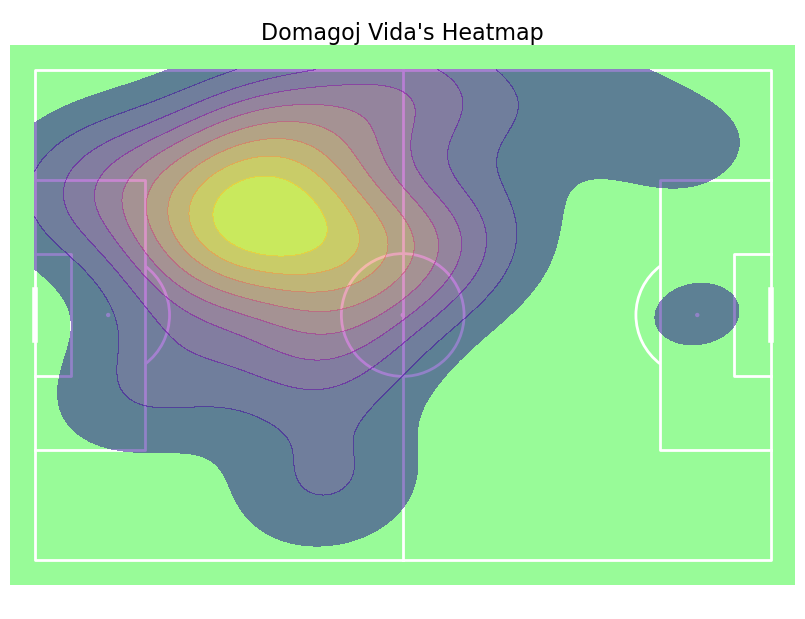

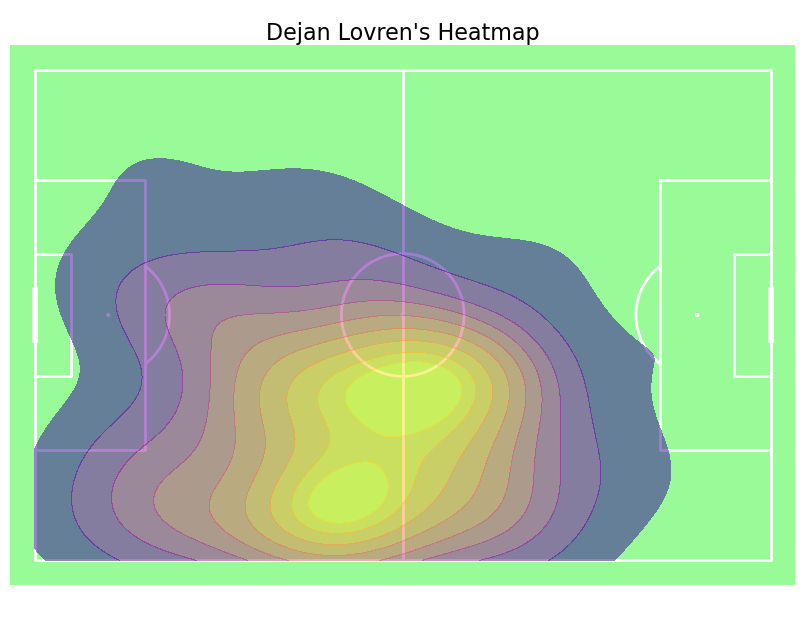

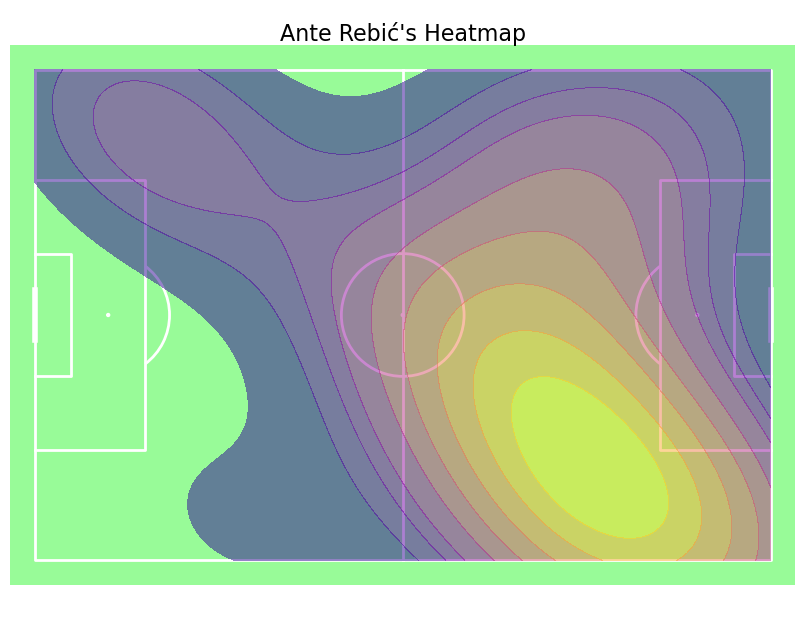

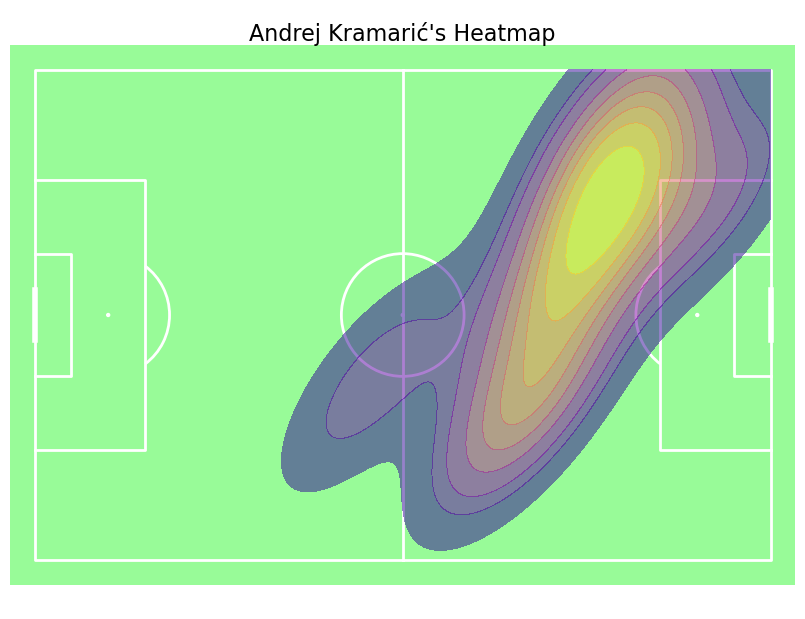

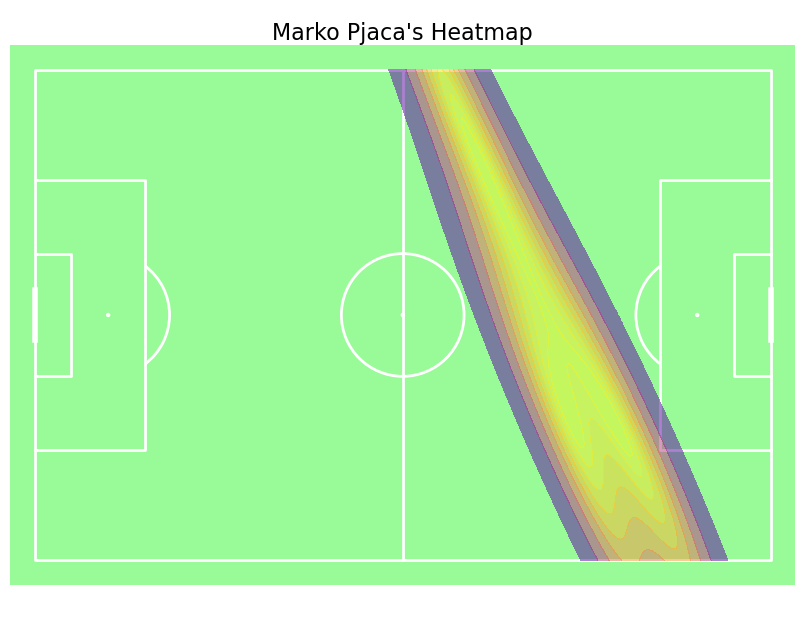

In [111]:
for player in Croatia_cleaned:
    generatePlayerHeatMap(player)

### K-means clustering

In [32]:
df = m_event[['team','type','location', 'pass_end_location']]
df.head()

,team,type,location,pass_end_location
0,France,Starting XI,NaN,NaN
1,Croatia,Starting XI,NaN,NaN
2,France,Half Start,NaN,NaN
3,Croatia,Half Start,NaN,NaN
4,Croatia,Half Start,NaN,NaN


In [34]:
df = df[(df['team']=='France')&(df['type'] == 'Pass')].reset_index()
df

,index,team,type,location,pass_end_location
0,11,France,Pass,"[48.0, 50.0]","[48.0, 60.0]"
1,24,France,Pass,"[49.0, 80.0]","[46.0, 61.0]"
2,25,France,Pass,"[65.0, 64.0]","[66.0, 69.0]"
3,28,France,Pass,"[63.0, 73.0]","[65.0, 79.0]"
4,29,France,Pass,"[58.0, 79.0]","[26.0, 69.0]"
...,...,...,...,...,...
287,837,France,Pass,"[34.0, 47.0]","[36.0, 42.0]"
288,842,France,Pass,"[15.0, 79.0]","[63.0, 79.0]"
289,845,France,Pass,"[70.0, 58.0]","[97.0, 66.0]"
290,847,France,Pass,"[31.0, 61.0]","[68.0, 80.0]"


In [37]:
df[['x_start', 'y_start']]=pd.DataFrame(df.location.tolist(), index = df.index)
df[['x_end', 'y_end']]=pd.DataFrame(df.pass_end_location.tolist(), index = df.index)

In [41]:
# Implement K-means
X = np.array(df[['x_start', 'x_end', 'y_start', 'y_end']])
kmeans = KMeans(n_clusters = 3, random_state = 30)
kmeans.fit(X)
df['cluster'] = kmeans.predict(X)

In [42]:
df.head()

,index,team,type,location,pass_end_location,x_start,y_start,x_end,y_end,cluster
0,11,France,Pass,"[48.0, 50.0]","[48.0, 60.0]",48.0,50.0,48.0,60.0,0
1,24,France,Pass,"[49.0, 80.0]","[46.0, 61.0]",49.0,80.0,46.0,61.0,0
2,25,France,Pass,"[65.0, 64.0]","[66.0, 69.0]",65.0,64.0,66.0,69.0,0
3,28,France,Pass,"[63.0, 73.0]","[65.0, 79.0]",63.0,73.0,65.0,79.0,0
4,29,France,Pass,"[58.0, 79.0]","[26.0, 69.0]",58.0,79.0,26.0,69.0,0


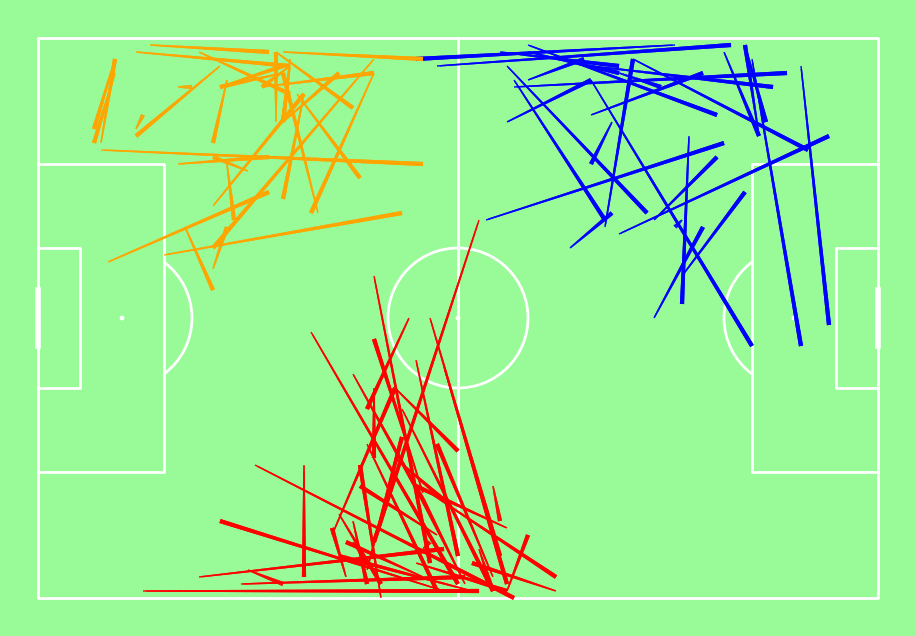

In [55]:
fig, ax = plt.subplots(figsize = (12, 8 ))
fig.set_facecolor('#98fb98')
ax.patch.set_facecolor('#98fb98')

pitch = Pitch(line_color='white', pitch_color='#98fb98')
pitch.draw(ax=ax)

for x in range(len(df['cluster'])):
    if df['cluster'][x] == 0:
        color = '#FF0000'
    elif df['cluster'][x] == 1:
        color = '#0000ff'
    elif df['cluster'][x] == 3:
        color = '#ffa500'
    else:
        continue
    
    pitch.lines(xstart=df['x_start'][x], ystart=df['y_start'][x], xend=df['x_end'][x], yend=df['y_end'][x], color=color, lw=3, zorder=2, comet=True, ax=ax)
    